In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

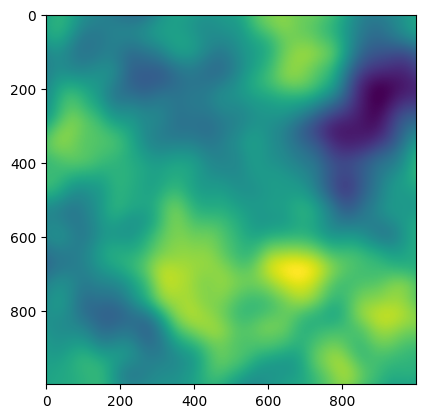

In [124]:
# pick random numbers for octaves

def generate_map(size=1000):
    oct1 = random.randint(1,4)
    oct2 = random.randint(3,6)
    oct3 = random.randint(5,8)
    oct4 = random.randint(7,10)
    noise1 = PerlinNoise(octaves=oct1)
    noise2 = PerlinNoise(octaves=oct2)
    noise3 = PerlinNoise(octaves=oct3)
    noise4 = PerlinNoise(octaves=oct4)
    xpix, ypix = size, size

    pic = []
    for i in range(xpix):
        row = []
        for j in range(ypix):
            noise_val = noise1([i/xpix, j/ypix])
            noise_val += 0.5 * noise2([i/xpix, j/ypix])
            noise_val += 0.25 * noise3([i/xpix, j/ypix])
            noise_val += 0.125 * noise4([i/xpix, j/ypix])

            row.append(noise_val)
        pic.append(row)

    pic = np.array(pic)
    # min-max normalize so that all values are between 0 and 1
    pic = (pic - np.min(pic))/(np.max(pic) - np.min(pic))
    
    return pic

newmap = generate_map()
plt.imshow(newmap)
plt.show()

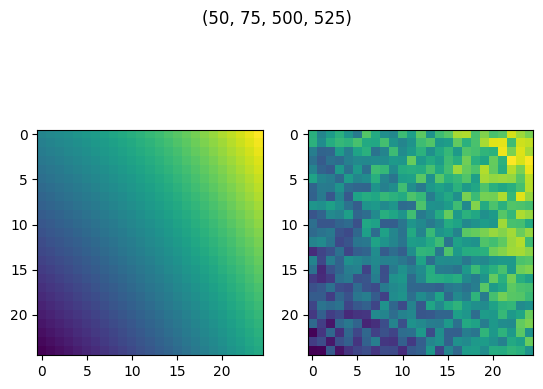

In [157]:
# observations should have some noise
# initial tests no noise though.

def get_noisy_observations(truemap, n, obs_size=25):
    obs_len = truemap.shape[0]//obs_size
    sample_locs = np.random.choice(obs_len**2, size=(n,), replace=False)
    observations = []
    noisy_observations = []
    # locations will have the bounds of each observation
    locations = []
    for loc in sample_locs:
        row = loc // obs_len
        col = loc % obs_len
        observation = np.array(truemap)[row*obs_size:(row+1)*obs_size, col*obs_size:(col+1)*obs_size]
        noise = np.random.uniform(high=np.mean(observation)/20, size=observation.shape)
        noisy_observation = observation + noise
        noisy_observation = (noisy_observation - np.min(noisy_observation))/(np.max(noisy_observation)-np.min(noisy_observation))
        observations.append(observation)
        noisy_observations.append(noisy_observation)
        locations.append((row*obs_size,(row+1)*obs_size,col*obs_size,(col+1)*obs_size))
    
    return observations, noisy_observations, locations

observations, noisy_observations, locations = get_noisy_observations(newmap, 1)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(observations[0])
ax2.imshow(noisy_observations[0])
f.suptitle(locations[0])
plt.show()

In [ ]:
# notes for implementation
# we likely want to have a softmax over actions (nn output) and then sample according to those probabilities
# to determine the action to take.